In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv(r'C:\Users\Admin\resources\GDPList.csv',encoding = 'ISO-8859-1')
data.head()

,Country,Continent,GDP (millions of US$)
0,Afghanistan,Asia,18181
1,Albania,Europe,12847
2,Algeria,Africa,190709
3,Angola,Africa,100948
4,Argentina,South America,447644


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Country                125 non-null    object
 1   Continent              125 non-null    object
 2   GDP (millions of US$)  125 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 3.1+ KB


In [ ]:
#Bộ dữ liệu chứa 125 dòng dữ liệu và 3 cột
#Country, Continent: là thuộc tính định tính, có thang đo định danh
#GDP: thuộc tính định lượng, thang đo ratio 

In [ ]:
#Việt hóa tên các cột trong bảng dữ liệu: Country 🡪 Nuoc; Continent 🡪 Chauluc; GDP (millions of US$) 🡪 GDP (trieu do)
data.rename(columns={'Country':'Nuoc','Continent':'Chauluc','GDP (millions of US$)':'GDP_trieu_do'},inplace=True)
data.head()

In [ ]:
#Chèn thêm một cột “Thanhpho” vào sau cột “Nuoc”, giá trị ban đầu là giá trị của cột “Nuoc” 
data.insert(1,'Thanhpho',data.loc[:,'Nuoc'])
data.head()

In [ ]:
#Trong cột Thanhpho, thay giá trị Vietnam thành Hanoi
data['Thanhpho'].replace(' Vietnam','Hanoi',inplace = True)
data

In [ ]:
#Xóa các bản ghi có Chauluc là ‘Asia’
#Dùng phương thức drop xóa các dòng, với tham số đầu tiên chỉ số của các dòng được xác định bởi phương thức loc: df.loc[df.ChauLuc == ‘Asia’].index
data.drop(data.loc[data.Chauluc == 'Asia'].index, axis = 0, inplace=True)
data

In [ ]:
#Xóa các bản ghi có GDP < 300000
data.drop(data.loc[data.GDP_trieu_do < 300000].index, axis = 0, inplace=True)
data

In [ ]:
plt.hist(data['GDP (millions of US$)']/1000, bins = 20)
plt.title("Phân bố GDP")
plt.xlabel('GDP (tỉ đô Mỹ)')
plt.ylabel('Số quốc gia')
plt.show()

In [ ]:
country = data.Country.unique()
print('Số lượng các quốc gia: ' + str(country.size))

In [ ]:
#Hơn 80% các quốc gia có GDP <1000 tỷ đô Mỹ 

In [ ]:
#Mỗi châu lục có bao nhiêu quốc gia
data.groupby('Continent')['Country'].count()

In [ ]:
#Tổng GDP các châu lục
data.groupby('Continent')['GDP (millions of US$)'].sum()

In [ ]:
#Top 10 quốc gia doanh thu lớn nhất
GDP_country = data.groupby(['Country'])['GDP (millions of US$)'].sum().sort_values(ascending= False)
GDP_country.head(10)

In [ ]:
#Tính giá trị lớn nhất và nhỏ nhất của GDP
print('Giá trị GDP nhỏ nhất là ',data['GDP (millions of US$)'].min())
print('Giá trị GDP lớn nhất là ',data['GDP (millions of US$)'].max())

In [ ]:
#châu lục nào xuất hiện nhiều nhất
data['Continent'].mode()

In [ ]:
#Với mỗi châu lục hãy tính tổng GDP; trung bình cộng GDP. Hợp nhất 2 bảng này thành một bảng duy nhất gồm 3 thông tin: Tên châu lục; Tổng GDP; TBC GDP.
data.pivot_table(values='GDP (millions of US$)', index='Continent',aggfunc={sum,'mean'})

In [4]:
#So sánh GDP các nước ở South America
data1=data.loc[data.Continent == 'South America']
data1

,Country,Continent,GDP (millions of US$)
4,Argentina,South America,447644
15,Brazil,South America,2492908
22,Chile,South America,248411
24,Colombia,South America,328422
34,Ecuador,South America,66381
86,Paraguay,South America,21236
87,Peru,South America,173502
119,Uruguay,South America,46872
121,Venezuela,South America,315841


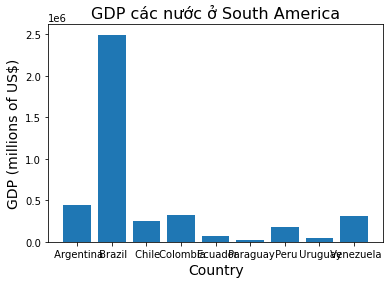

In [9]:
plt.bar(data1['Country'], data1['GDP (millions of US$)'])
plt.title('GDP các nước ở South America', fontsize = 16)
plt.xlabel('Country', fontsize = 14)
plt.ylabel('GDP (millions of US$)', fontsize = 14)
plt.show()

Nhận xét:
GDP các nước đều dưới 0,5 triệu đô trừ GDP của Brazil cao vượt bậc gấp ít nhất 5 lần so với các nước tronng South America
GDP Các nước (Argentina, Colombia, Venezuela) gần đạt 0,5 triệu đô.
Riêng GDP các nước Paraguay, Uruguay, Ecuador thì rất thấp chưa đạt được 0,1 triệu đô.

In [29]:
#Đánh giá tỉ lệ đóng góp GDP của Việt Nam trên tổng số GDP của 5 nước Đông Nam Á là Vietnam,  Indonesia, Cambodia, Thailand và Malaysia.

data2=data.loc[(data['Country'] == ' Vietnam')|(data['Country'] == ' Indonesia')|(data['Country'] == ' Cambodia')|(data['Country'] == ' Thailand')|(data['Country'] == ' Malaysia')]
data2

,Country,Continent,GDP (millions of US$)
19,Cambodia,Asia,12861
53,Indonesia,Asia,845680
70,Malaysia,Asia,278680
109,Thailand,Asia,345649
122,Vietnam,Asia,122722


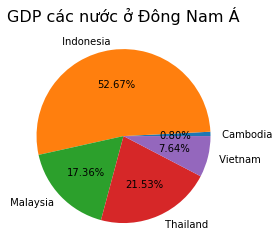

In [33]:
plt.pie(data2['GDP (millions of US$)'], labels = data2['Country'],autopct='%1.2f%%')
plt.title('GDP các nước ở Đông Nam Á', fontsize = 16)
plt.show()

Nhận xét:
Việt Nam chỉ mới đóng góp được một phần nhỏ vào GDP các nước ở Đông Nam Á, đứng thứ tư trong 5 nước.
Đứng đầu đóng góp là Indonesia với hơn một nửa GDP các nước ở Đông Nam Á